In [92]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

In [93]:
def save_performance_table(df, metric, output_dir, fname):
    
    os.makedirs(output_dir, exist_ok=True)
    
    grouped_df = df.groupby(['subject_id', 'montage', 'window']).mean()[[metric]]
    grouped_df.reset_index(inplace=True)
    new_df = pd.DataFrame()
    for subject_id in grouped_df.subject_id.unique():
        subset = (grouped_df[grouped_df['subject_id'] == subject_id].copy()).loc[:, ['window', 'montage', metric]].reset_index(drop=True)
        if 'window' in new_df.columns:
            subset = subset.loc[:, [metric]]
        subset.rename({metric: subject_id}, axis=1, inplace=True)
        new_df = pd.concat([new_df, subset], axis=1)
        new_df.groupby(['window', 'montage']).mean().reset_index().to_csv(os.path.join(output_dir, fname), index=False)

# PC anchor

In [141]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'pc')
output_table_dir = os.path.join(os.path.join(constants.RESULTS_DIR, 'motor_LR', 'acc_tables', 'csp_baseline', 'linear_svm', 'pc'))

df = pd.DataFrame()

for directory in ['32_filters', '16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [142]:
output_df = df[(df['selection_method'] == 'None') & (df['n_filters'] == 32)].groupby(['window', 'montage']).mean()[test_cols].round(3)
output_df

Test Accuracy  Test Precision  Test Recall  Test F1
window montage                                                     
all    a                0.483           0.481        0.482    0.477
       b                0.517           0.518        0.517    0.513
       c                0.499           0.497        0.499    0.493
       d                0.492           0.492        0.492    0.487
       e                0.484           0.483        0.484    0.480
       f                0.514           0.515        0.515    0.509
       g                0.489           0.488        0.489    0.483
       h                0.494           0.493        0.493    0.488
0      a                0.511           0.511        0.510    0.506
       b                0.469           0.468        0.469    0.465
       c                0.497           0.495        0.497    0.489
       d                0.509           0.509        0.509    0.505
       e                0.495           0.499        0.496    0.482
       f                0.478           0.477        0.478    0.472
       g                0.515           0.514        0.514    0.510
       h                0.513           0.514        0.513    0.508
1      a                0.504           0.505        0.504    0.498
       b                0.491           0.491        0.491    0.486
       c                0.507           0.506        0.506    0.500
       d                0.497           0.496        0.497    0.492
       e                0.515           0.515        0.514    0.508
       f                0.495           0.495        0.495    0.489
       g                0.503           0.504        0.503    0.499
       h                0.488           0.486        0.488    0.482
2      a                0.498           0.498        0.498    0.493
       b                0.487           0.486        0.486    0.482
       c                0.507           0.507        0.507    0.501
       d                0.495           0.495        0.496    0.490
       e                0.488           0.489        0.488    0.481
       f                0.492           0.490        0.492    0.486
       g                0.505           0.503        0.504    0.498
       h                0.497           0.496        0.496    0.491
3      a                0.490           0.488        0.490    0.483
       b                0.510           0.511        0.510    0.505
       c                0.500           0.501        0.500    0.494
       d                0.496           0.496        0.496    0.491
       e                0.509           0.508        0.508    0.500
       f                0.519           0.520        0.519    0.515
       g                0.507           0.507        0.507    0.501
       h                0.486           0.485        0.486    0.481
4      a                0.505           0.505        0.505    0.500
       b                0.524           0.525        0.524    0.519
       c                0.504           0.503        0.504    0.498
       d                0.482           0.482        0.482    0.478
       e                0.489           0.489        0.489    0.485
       f                0.510           0.510        0.510    0.506
       g                0.495           0.495        0.495    0.490
       h                0.507           0.506        0.506    0.502
5      a                0.504           0.504        0.504    0.498
       b                0.522           0.523        0.522    0.517
       c                0.491           0.490        0.490    0.482
       d                0.512           0.512        0.512    0.509
       e                0.524           0.526        0.524    0.519
       f                0.497           0.498        0.498    0.494
       g                0.494           0.495        0.494    0.488
       h                0.499           0.499        0.499    0.496
6      a                0.496           0.496        0.496    0.490
    

In [143]:
output_df.reset_index(inplace=True)
print(output_df.to_latex(index=False,
                         header=['Window', 'Montage', 'Accuracy', 'Precision', 'Recall', 'F1']))

\begin{tabular}{llrrrr}
\toprule
Window & Montage & Accuracy & Precision & Recall &     F1 \\
\midrule
   all &       a &    0.483 &     0.481 &  0.482 &  0.477 \\
   all &       b &    0.517 &     0.518 &  0.517 &  0.513 \\
   all &       c &    0.499 &     0.497 &  0.499 &  0.493 \\
   all &       d &    0.492 &     0.492 &  0.492 &  0.487 \\
   all &       e &    0.484 &     0.483 &  0.484 &  0.480 \\
   all &       f &    0.514 &     0.515 &  0.515 &  0.509 \\
   all &       g &    0.489 &     0.488 &  0.489 &  0.483 \\
   all &       h &    0.494 &     0.493 &  0.493 &  0.488 \\
     0 &       a &    0.511 &     0.511 &  0.510 &  0.506 \\
     0 &       b &    0.469 &     0.468 &  0.469 &  0.465 \\
     0 &       c &    0.497 &     0.495 &  0.497 &  0.489 \\
     0 &       d &    0.509 &     0.509 &  0.509 &  0.505 \\
     0 &       e &    0.495 &     0.499 &  0.496 &  0.482 \\
     0 &       f &    0.478 &     0.477 &  0.478 &  0.472 \\
     0 &       g &    0.515 &     0.514 &  

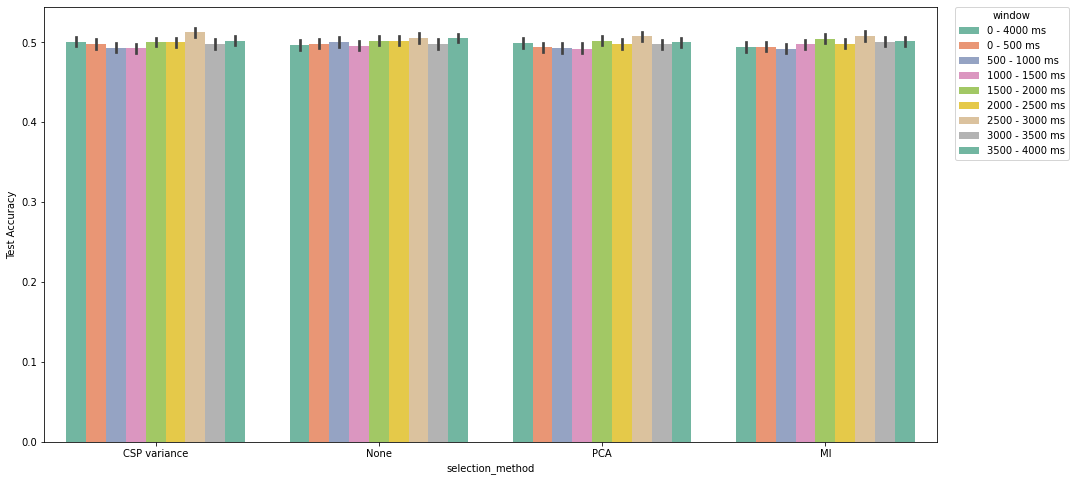

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 32], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

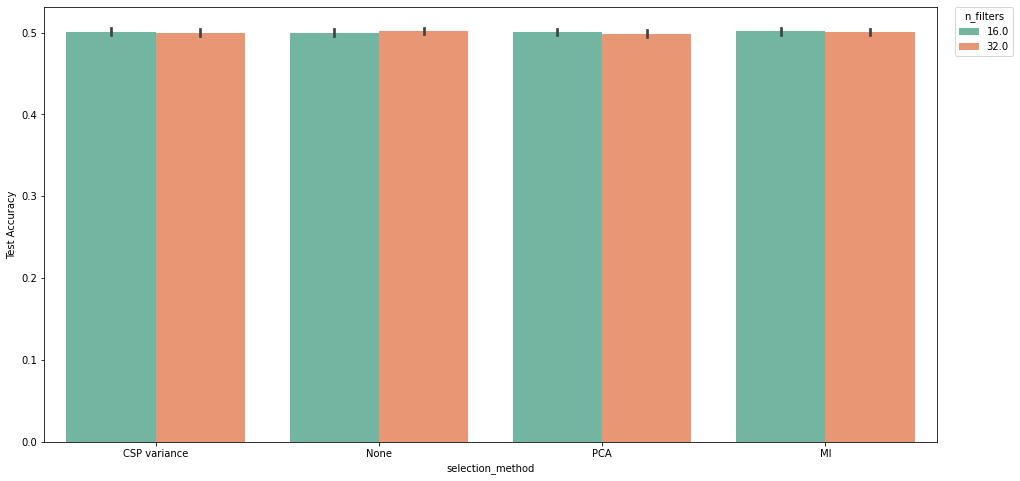

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7'))], x='selection_method', y='Test Accuracy', hue='n_filters', palette='Set2', ax=ax)
plt.legend(title='n_filters', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

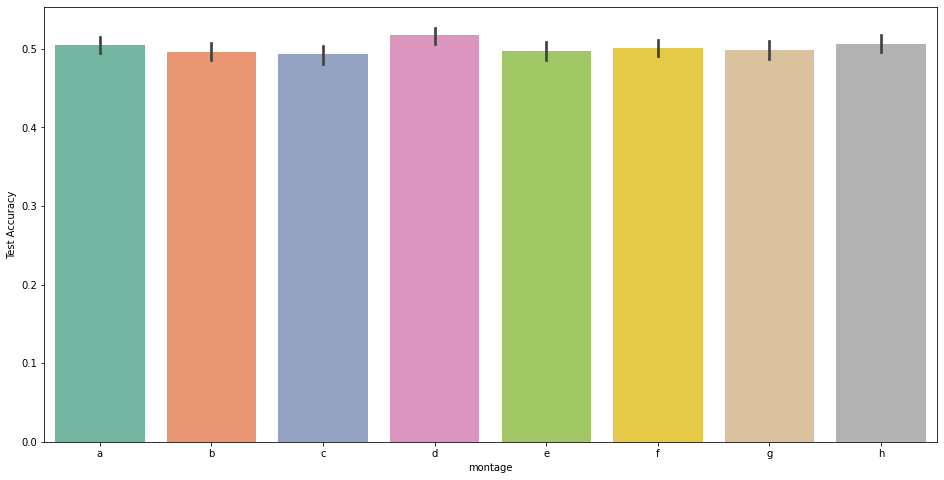

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7')) & (df['n_filters'] == 32) & (df['selection_method'] == 'None')],
            x='montage', y='Test Accuracy', palette='Set2', ax=ax);

In [122]:
fname = 'no_selection_32filt_test_accuracy_table.csv'

save_performance_table(df[((df['window'] == '6') | (df['window'] == '7')) & (df['selection_method'] == 'None') & (df['n_filters'] == 32)],
                       'Test Accuracy', output_table_dir, fname)

In [123]:
fname = 'csp_var_32filt_test_accuracy_table.csv'

save_performance_table(df[((df['window'] == '6') | (df['window'] == '7')) & (df['selection_method'] == 'CSP variance') & (df['n_filters'] == 32)],
                       'Test Accuracy', output_table_dir, fname)

# RS anchor

In [129]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'rs')
output_table_dir = os.path.join(os.path.join(constants.RESULTS_DIR, 'motor_LR', 'acc_tables', 'csp_baseline', 'linear_svm', 'rs'))

df = pd.DataFrame()

for directory in ['32_filters', '16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [130]:
output_df = df[(df['selection_method'] == 'None') & (df['n_filters'] == 32)].groupby(['window', 'montage']).mean()[test_cols].round(3)
output_df

Test Accuracy  Test Precision  Test Recall  Test F1
window montage                                                     
all    a                0.473           0.471        0.472    0.467
       b                0.496           0.495        0.495    0.490
       c                0.462           0.459        0.462    0.455
       d                0.484           0.482        0.484    0.478
       e                0.485           0.483        0.485    0.479
       f                0.518           0.518        0.517    0.512
       g                0.481           0.478        0.480    0.475
       h                0.492           0.491        0.491    0.487
0      a                0.513           0.514        0.513    0.509
       b                0.498           0.498        0.497    0.492
       c                0.509           0.509        0.509    0.504
       d                0.511           0.512        0.511    0.506
       e                0.501           0.500        0.501    0.494
       f                0.495           0.495        0.495    0.489
       g                0.497           0.496        0.496    0.490
       h                0.508           0.506        0.507    0.500
1      a                0.489           0.487        0.488    0.483
       b                0.513           0.513        0.512    0.506
       c                0.502           0.502        0.502    0.495
       d                0.510           0.509        0.509    0.503
       e                0.495           0.495        0.495    0.489
       f                0.477           0.476        0.477    0.471
       g                0.506           0.506        0.506    0.501
       h                0.498           0.497        0.497    0.493
2      a                0.494           0.494        0.493    0.487
       b                0.491           0.490        0.490    0.483
       c                0.507           0.506        0.507    0.500
       d                0.505           0.504        0.504    0.500
       e                0.511           0.513        0.511    0.504
       f                0.496           0.496        0.496    0.490
       g                0.485           0.483        0.484    0.478
       h                0.494           0.493        0.494    0.487
3      a                0.507           0.507        0.507    0.503
       b                0.505           0.505        0.505    0.499
       c                0.501           0.502        0.501    0.494
       d                0.509           0.510        0.509    0.505
       e                0.477           0.477        0.478    0.471
       f                0.511           0.511        0.511    0.504
       g                0.522           0.523        0.522    0.516
       h                0.519           0.518        0.517    0.510
4      a                0.505           0.506        0.505    0.499
       b                0.523           0.523        0.523    0.518
       c                0.521           0.521        0.521    0.515
       d                0.473           0.471        0.473    0.467
       e                0.488           0.486        0.487    0.479
       f                0.501           0.501        0.501    0.496
       g                0.498           0.497        0.498    0.492
       h                0.502           0.503        0.501    0.496
5      a                0.496           0.494        0.495    0.488
       b                0.498           0.496        0.497    0.490
       c                0.498           0.498        0.498    0.492
       d                0.499           0.499        0.498    0.493
       e                0.473           0.473        0.474    0.466
       f                0.518           0.519        0.518    0.513
       g                0.498           0.498        0.498    0.492
       h                0.501           0.500        0.500    0.494
6      a                0.491           0.491        0.491    0.486
    

In [131]:
output_df.reset_index(inplace=True)
print(output_df.to_latex(index=False,
                         header=['Window', 'Montage', 'Accuracy', 'Precision', 'Recall', 'F1']))

\begin{tabular}{llrrrr}
\toprule
Window & Montage & Accuracy & Precision & Recall &     F1 \\
\midrule
   all &       a &    0.473 &     0.471 &  0.472 &  0.467 \\
   all &       b &    0.496 &     0.495 &  0.495 &  0.490 \\
   all &       c &    0.462 &     0.459 &  0.462 &  0.455 \\
   all &       d &    0.484 &     0.482 &  0.484 &  0.478 \\
   all &       e &    0.485 &     0.483 &  0.485 &  0.479 \\
   all &       f &    0.518 &     0.518 &  0.517 &  0.512 \\
   all &       g &    0.481 &     0.478 &  0.480 &  0.475 \\
   all &       h &    0.492 &     0.491 &  0.491 &  0.487 \\
     0 &       a &    0.513 &     0.514 &  0.513 &  0.509 \\
     0 &       b &    0.498 &     0.498 &  0.497 &  0.492 \\
     0 &       c &    0.509 &     0.509 &  0.509 &  0.504 \\
     0 &       d &    0.511 &     0.512 &  0.511 &  0.506 \\
     0 &       e &    0.501 &     0.500 &  0.501 &  0.494 \\
     0 &       f &    0.495 &     0.495 &  0.495 &  0.489 \\
     0 &       g &    0.497 &     0.496 &  

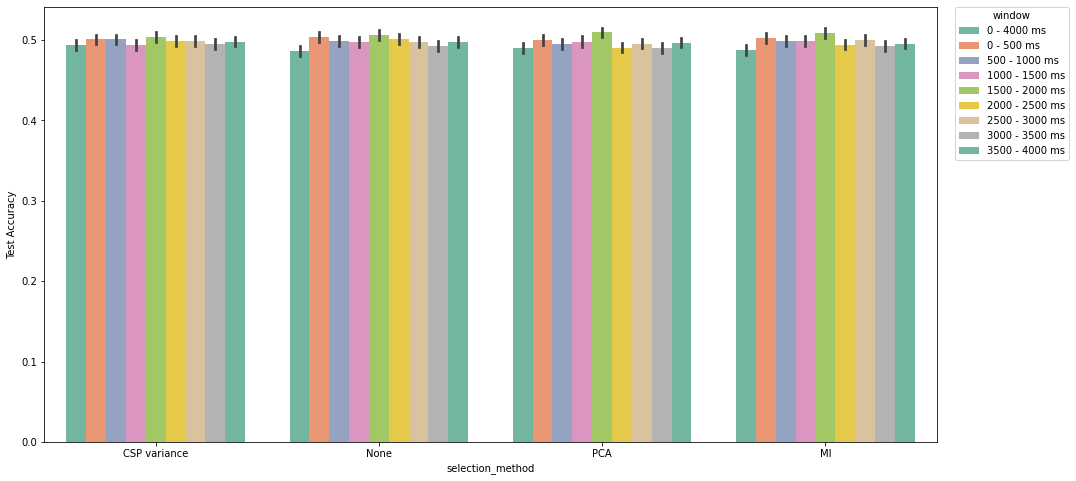

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 32], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

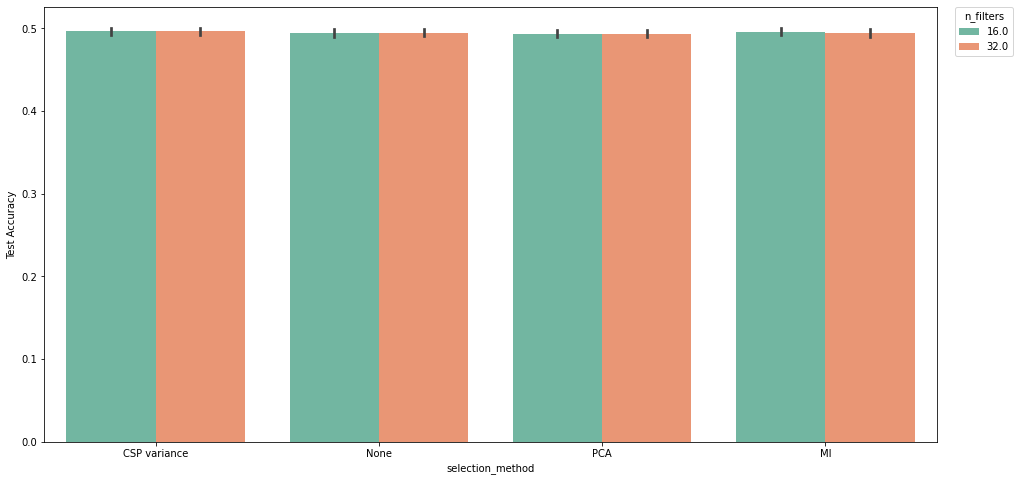

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7'))], x='selection_method', y='Test Accuracy', hue='n_filters', palette='Set2', ax=ax)
plt.legend(title='n_filters', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

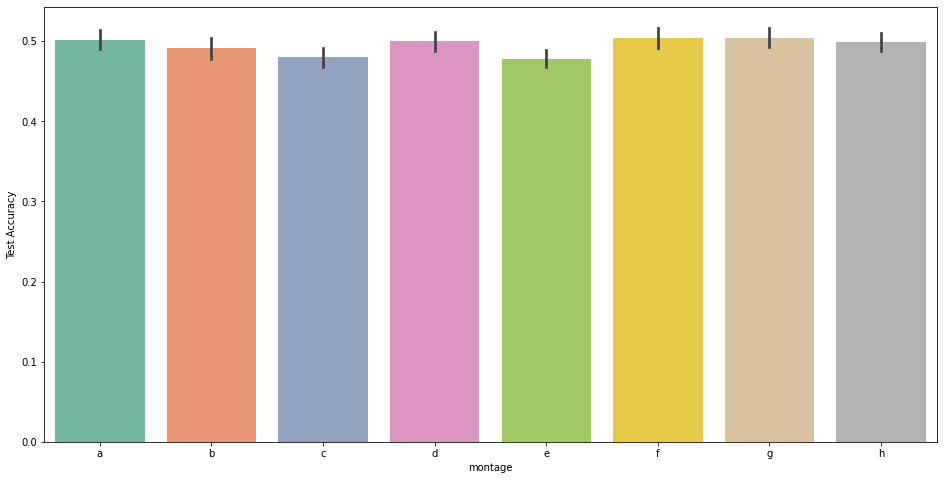

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7')) & (df['n_filters'] == 32) & (df['selection_method'] == 'None')],
            x='montage', y='Test Accuracy', palette='Set2', ax=ax);

In [135]:
fname = 'no_selection_32filt_test_accuracy_table.csv'

save_performance_table(df[((df['window'] == '6') | (df['window'] == '7')) & (df['selection_method'] == 'None') & (df['n_filters'] == 32)],
                       'Test Accuracy', output_table_dir, fname)

In [136]:
fname = 'csp_var_32filt_test_accuracy_table.csv'

save_performance_table(df[((df['window'] == '6') | (df['window'] == '7')) & (df['selection_method'] == 'CSP variance') & (df['n_filters'] == 32)],
                       'Test Accuracy', output_table_dir, fname)